In [ ]:
from google.colab import files


uploaded = files.upload()

Saving broadway.csv to broadway.csv


This dataset holds reports of Broadway shows, grouped over weeklong periods.the dataset stretches the 1990s to 2016. The dataset is made available by the Broadway League (the national trade association for the Broadway industry), and you can view the data online at http://www.broadwayleague.com/.

We will do some comparative analysis focusing on Attendance and Gross.

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import cycle, islice
import io

df = pd.read_csv(io.BytesIO(uploaded['broadway.csv']))
df.head(10)

,Date.Day,Date.Full,Date.Month,Date.Year,Show.Name,Show.Theatre,Show.Type,Statistics.Attendance,Statistics.Capacity,Statistics.Gross,Statistics.Gross Potential,Statistics.Performances
0,26,8/26/1990,8,1990,Tru,Booth,Play,5500,88,134456,0,8
1,24,3/24/1991,3,1991,Miss Saigon,Broadway,Musical,1737,100,100647,0,0
2,31,3/31/1991,3,1991,Miss Saigon,Broadway,Musical,12160,100,634424,0,0
3,7,4/7/1991,4,1991,Miss Saigon,Broadway,Musical,13921,100,713353,0,0
4,14,4/14/1991,4,1991,Miss Saigon,Broadway,Musical,10973,90,573981,0,4
5,21,4/21/1991,4,1991,Miss Saigon,Broadway,Musical,14076,101,706793,0,8
6,28,4/28/1991,4,1991,Miss Saigon,Broadway,Musical,14065,101,714968,0,8
7,5,5/5/1991,5,1991,Miss Saigon,Broadway,Musical,14064,101,730765,0,8
8,12,5/12/1991,5,1991,Miss Saigon,Broadway,Musical,13896,100,766713,0,8
9,19,5/19/1991,5,1991,Miss Saigon,Broadway,Musical,13738,99,763332,0,8


In [ ]:
df.count()

Date.Day                      31296
Date.Full                     31296
Date.Month                    31296
Date.Year                     31296
Show.Name                     31296
Show.Theatre                  31296
Show.Type                     31296
Statistics.Attendance         31296
Statistics.Capacity           31296
Statistics.Gross              31296
Statistics.Gross Potential    31296
Statistics.Performances       31296
dtype: int64

In [ ]:
df.isnull().sum()

Date.Day                      0
Date.Full                     0
Date.Month                    0
Date.Year                     0
Show.Name                     0
Show.Theatre                  0
Show.Type                     0
Statistics.Attendance         0
Statistics.Capacity           0
Statistics.Gross              0
Statistics.Gross Potential    0
Statistics.Performances       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df["Date.Year"].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016])

In [ ]:
df.drop(['Date.Day','Date.Full','Date.Month','Show.Theatre','Statistics.Capacity','Statistics.Gross Potential','Statistics.Performances'],inplace=True, axis=1)

In [ ]:
df.head()

,Date.Year,Show.Name,Show.Type,Statistics.Attendance,Statistics.Gross
0,1990,Tru,Play,5500,134456
1,1991,Miss Saigon,Musical,1737,100647
2,1991,Miss Saigon,Musical,12160,634424
3,1991,Miss Saigon,Musical,13921,713353
4,1991,Miss Saigon,Musical,10973,573981


In [ ]:
#A look at the attendance over the years
df.groupby(['Date.Year'])['Statistics.Attendance'].sum()

Date.Year
1990        5500
1991      559179
1992      856809
1993     1038747
1994     1774391
1995     3982285
1996     7448692
1997    10557122
1998    11618305
1999    11505206
2000    12252863
2001    11382440
2002    11394477
2003    11081183
2004    11329926
2005    11975625
2006    12274805
2007    12126711
2008    12850231
2009    11680764
2010    12098765
2011    12127171
2012    12473907
2013    11575941
2014    13125306
2015    12976878
2016     8624099
Name: Statistics.Attendance, dtype: int64

<Axes: title={'center': 'Broadway attendance over the years'}, xlabel='Years', ylabel='Attendance'>

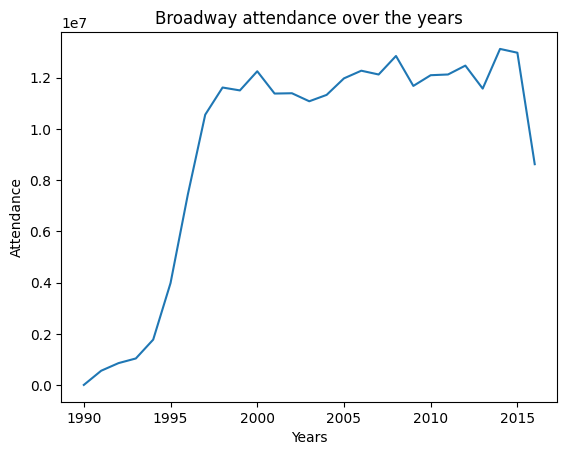

In [ ]:

df.groupby(['Date.Year'])['Statistics.Attendance'].sum().plot(kind='line',title='Broadway attendance over the years',xlabel='Years',ylabel='Attendance')

In [ ]:
#A look at the gross Revenue over the years
df.groupby(['Date.Year'])['Statistics.Gross'].sum()

Date.Year
1990        134456
1991      30665673
1992      42262582
1993      46171494
1994      83518661
1995     197856030
1996     351762607
1997     506095272
1998     576194584
1999     588202096
2000     678334768
2001     643802427
2002     706243486
2003     724662867
2004     748856045
2005     825189740
2006     934493487
2007     927333504
2008     985446068
2009     969559631
2010    1036268428
2011    1080657836
2012    1195400385
2013    1192039179
2014    1360510811
2015    1353143674
2016     869763802
Name: Statistics.Gross, dtype: int64

<Axes: title={'center': 'Broadway revenue over the years'}, xlabel='Years', ylabel='Revenue'>

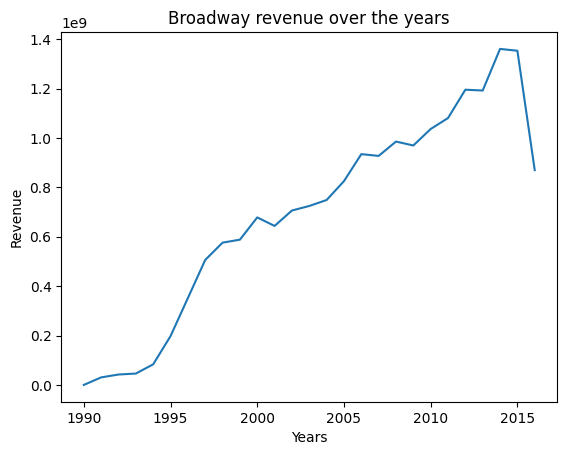

In [ ]:
#A look at the Gross revenue over the years
df.groupby(['Date.Year'])['Statistics.Gross'].sum().plot(kind='line',title='Broadway revenue over the years',xlabel='Years',ylabel='Revenue')

In [ ]:
#A look at the Gross revenue for Plays only over the years
df_Play=df[df['Show.Type'].str.contains('Play')]
df_Play.groupby(['Date.Year'])['Statistics.Gross'].sum()

Date.Year
1990       134456
1992      5947347
1993     13881777
1994      7121377
1995     26018035
1996     51918162
1997     52759584
1998     82071233
1999     88126118
2000     94819289
2001    105042201
2002    127853193
2003     88802740
2004     86531490
2005    136059853
2006    112533124
2007     97269949
2008    150569296
2009    161686176
2010    135378827
2011    175408894
2012    212503069
2013    185176833
2014    213930241
2015    230404143
2016     96037954
Name: Statistics.Gross, dtype: int64

<Axes: title={'center': 'Plays revenue over the years'}, xlabel='Years', ylabel='Revenue'>

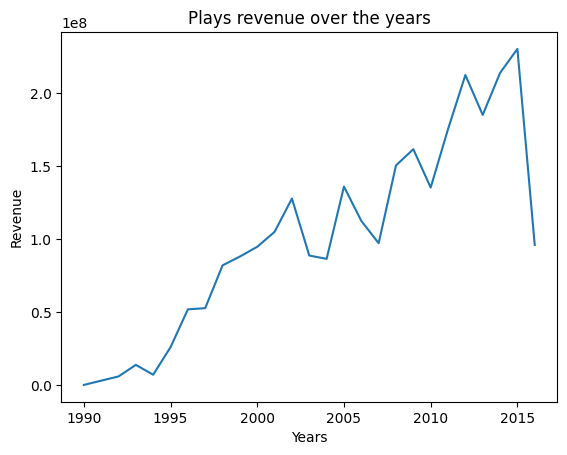

In [ ]:
df_Play.groupby(['Date.Year'])['Statistics.Gross'].sum().plot(kind='line',title='Plays revenue over the years',xlabel='Years',ylabel='Revenue')

In [ ]:
#A look at the Gross revenue for Musicals only over the years
df_Musical=df[df['Show.Type'].str.contains('Musical')]
df_Musical.groupby(['Date.Year'])['Statistics.Gross'].sum()

Date.Year
1991      30665673
1992      36315235
1993      32289717
1994      76237284
1995     171643239
1996     293476296
1997     444099366
1998     482579823
1999     497363590
2000     582159957
2001     538721007
2002     575511330
2003     634995789
2004     661598221
2005     688849407
2006     821960363
2007     830063555
2008     826166290
2009     798973962
2010     895857354
2011     888850814
2012     974945237
2013     993570449
2014    1140640907
2015    1104151044
2016     771054184
Name: Statistics.Gross, dtype: int64

<Axes: title={'center': 'Musicals revenue over the years'}, xlabel='Years', ylabel='Revenue'>

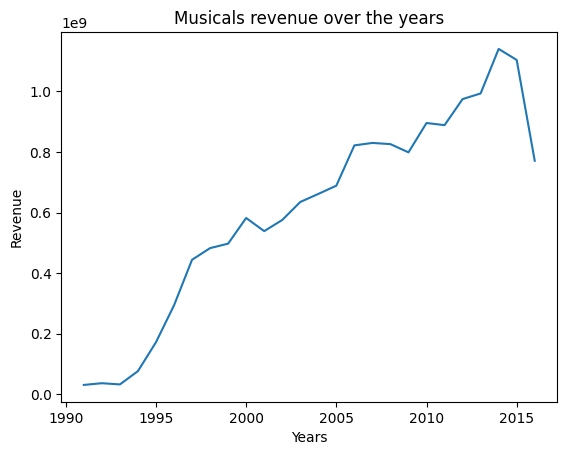

In [ ]:
df_Musical.groupby(['Date.Year'])['Statistics.Gross'].sum().plot(kind='line',title='Musicals revenue over the years',xlabel='Years',ylabel='Revenue')

In [ ]:
#Top 10 most running shows over the years
df.groupby(['Show.Name'])['Date.Year'].count().sort_values(ascending=False).head(10)

Show.Name
The Phantom Of The Opera    1053
Chicago                     1032
The Lion King                980
Mamma Mia!                   725
Beauty And The Beast         690
Wicked                       669
Rent                         639
Jersey Boys                  565
Miss Saigon                  489
Les Miserables               365
Name: Date.Year, dtype: int64

In [ ]:
##Top 10 most running Plays over the years
df_Play_Year=df[df['Show.Type'].str.contains('Play')]
df_Play_Year.groupby(['Show.Name'])['Date.Year'].count().sort_values(ascending=False).head(10)

Show.Name
Proof                                                117
The Tale Of The Allergist'S Wife                     101
The Curious Incident Of The Dog In The Night-Time    101
The 39 Steps                                         100
War Horse                                             95
August: Osage County                                  84
Art                                                   78
Defending The Caveman                                 77
The Last Night Of Ballyhoo                            73
The Sisters Rosensweig                                72
Name: Date.Year, dtype: int64

In [ ]:
#Top 10 longest running Musicals over the years
df_Musical_Year=df[df['Show.Type'].str.contains('Musical')]
df_Musical_Year.groupby(['Show.Name'])['Date.Year'].count().sort_values(ascending=False).head(10)

Show.Name
The Phantom Of The Opera    1053
Chicago                     1032
The Lion King                980
Mamma Mia!                   725
Beauty And The Beast         690
Wicked                       669
Rent                         639
Jersey Boys                  565
Miss Saigon                  489
Les Miserables               365
Name: Date.Year, dtype: int64

<Axes: title={'center': 'Longest running Musicals over the years'}, xlabel='Show.Name'>

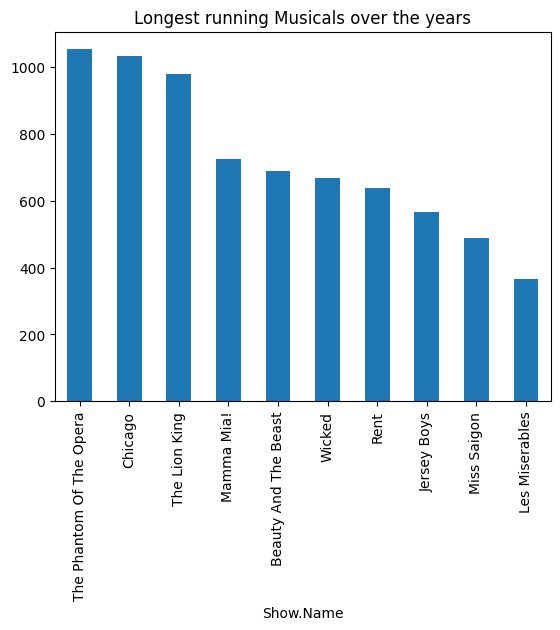

In [ ]:
df_Musical_Year.groupby(['Show.Name'])['Date.Year'].count().sort_values(ascending=False).head(10).plot(kind='bar',title='Longest running Musicals over the years')

In [ ]:
#Gross revenue of the top 10 Musicals
df_Musical_Year.groupby(['Show.Name'])['Statistics.Gross'].sum().sort_values(ascending=False).head(10)

Show.Name
The Lion King               1289388835
Wicked                      1039921344
The Phantom Of The Opera     790512187
Mamma Mia!                   624391693
Chicago                      560575239
Jersey Boys                  538533258
The Book Of Mormon           437403089
Beauty And The Beast         429158458
Mary Poppins                 294558648
The Producers                288361724
Name: Statistics.Gross, dtype: int64

<Axes: title={'center': 'Revenue of the top 10 Musicals'}, xlabel='Musicals', ylabel='Revenue'>

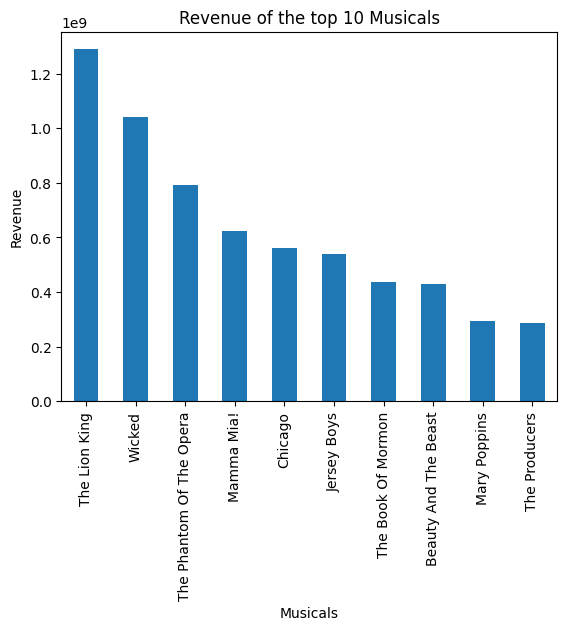

In [ ]:
df_Musical_Year.groupby(['Show.Name'])['Statistics.Gross'].sum().sort_values(ascending=False).head(10).plot(kind='bar',title='Revenue of the top 10 Musicals',xlabel='Musicals',ylabel='Revenue')

**Conclusion**

We noticed that the attendance for Broadway shows kept increasing from 1990 till 1997 and then became more stable but the Gross profit kept increasing through out the years

Musicals tend to making more profit then Plays and they run for a longer time

The longest running shows from 1990 till 2016 are Musicals with THE PAHNTON OF THE OPERA on top of the list followed by CHICAGO and The Lion KING

But the most profitable show over the years is THE LION KING followed by WICKED then THE PAHNTON OF THE OPERA